### Cloning quasars

- Upsample this distribution in two ways, using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)
- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data. Does that agree with your expectation? 

(Hint: It shouldn't. But why?) 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
import scipy
import astropy
import astroML

plt.rc('text', usetex=True)  
plt.rc('font', family='serif')

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

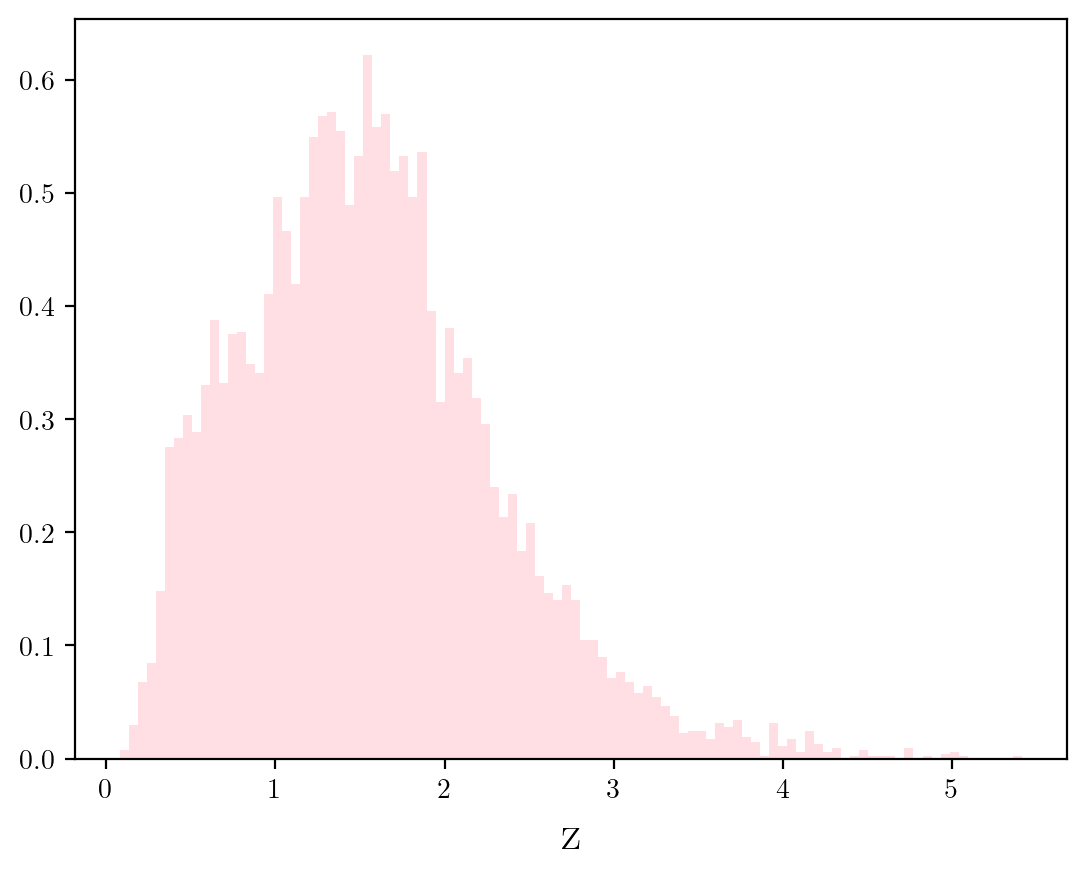

In [20]:
#hist redshift
counts, bins = np.histogram(z, bins=int(np.sqrt(10000)), density=True)
plt.hist(z, bins=100, histtype='stepfilled',color='pink', alpha=0.5, density=True)
plt.xlabel('z', fontsize=18)
plt.show()

### Rejection sampling

In [7]:
ymax = np.max(counts)
xmax = np.max(bins)
xmin = np.min(bins)

N=100000

x = np.random.uniform(xmin,xmax,N)
y = np.random.uniform(0,ymax,N)

bin_indices = np.digitize(x, bins) - 1  #np function to find in which bin a point is, result:array of indices that refers to the bin 
valid_points = y < counts[bin_indices]  #result:array of true, false boolean

xsample = x[valid_points]

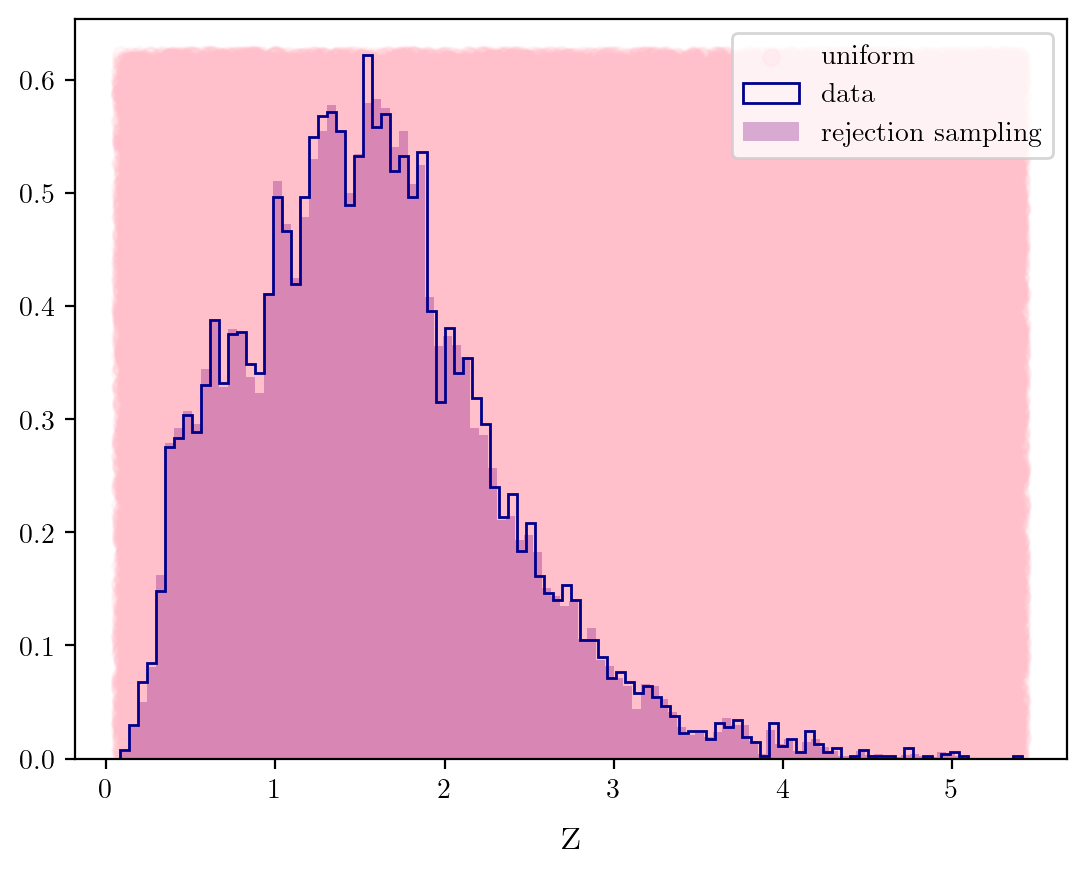

In [28]:
plt.scatter(x,y, color='pink', alpha=0.1, label='uniform')
counts, bins = np.histogram(z, bins=int(np.sqrt(10000)), density=True)

plt.hist(z, bins=100, histtype='step', density=True, label='data', color='darkblue')

plt.hist(xsample, bins=100, density=True, histtype='stepfilled',alpha=0.3, label=' rejection sampling', color='purple')

plt.xlabel('z', fontsize=18)
plt.legend(loc='upper right')
plt.show()

### Inverse Sampling

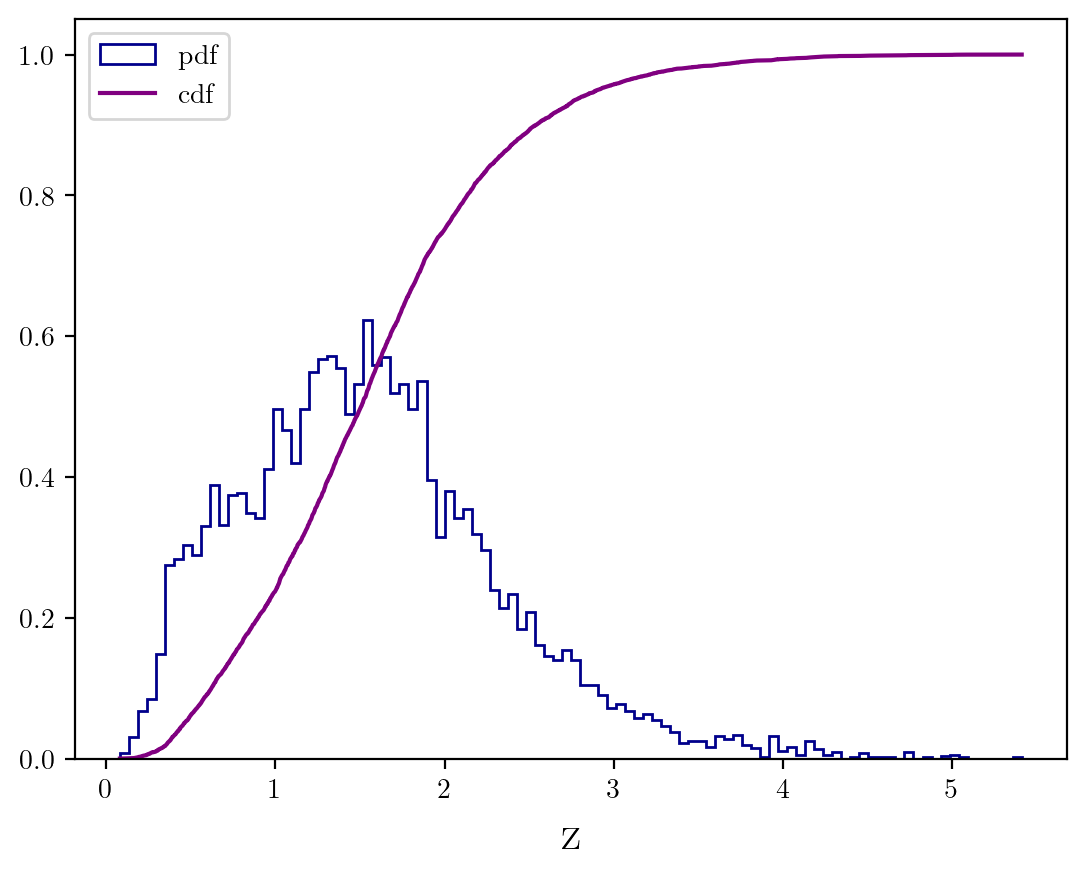

In [29]:
#cdf
z.sort()
p_cdf = np.linspace(0, 1, len(z))

plt.hist(z, bins=100, histtype='step', density=True, color='darkblue', label='pdf')
plt.plot(z, p_cdf, color='purple', label='cdf')

#oppure simple_cdf = np.cumsum(counts) / np.sum(counts)
plt.xlabel('z', fontsize=18)
plt.legend(loc='upper left')
plt.show()

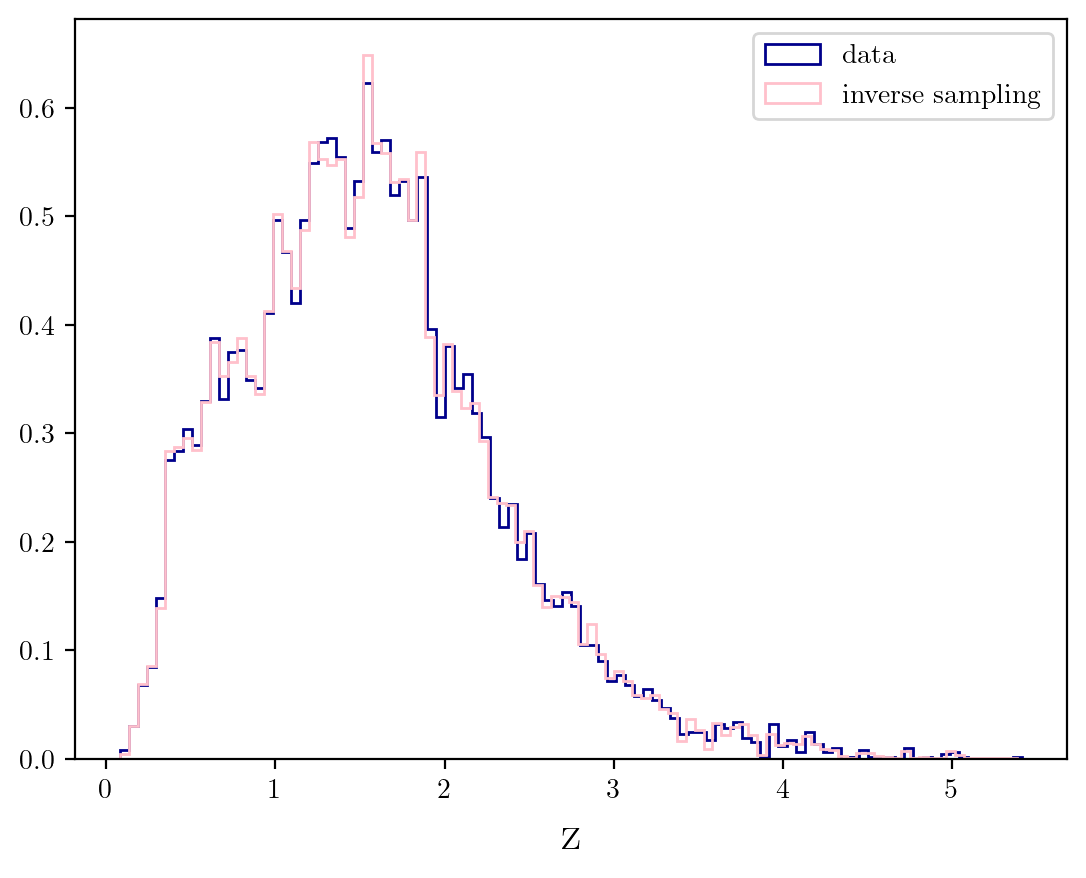

In [34]:
unif_samples = np.random.uniform(0, 1, N)

z_samples = np.interp(unif_samples, p_cdf, z)

plt.hist(z, bins=100, histtype='step', density=True, color='darkblue', label='data')
plt.hist(z_samples, bins=100, histtype='step', density=True, color='pink', label='inverse sampling')

plt.xlabel('z', fontsize=18)
plt.legend(loc='upper right')
plt.show()


## La parte di cosmologia?

In [56]:
import astropy
astropy.cosmology.Planck18

FlatLambdaCDM(name="Planck18", H0=67.66 km / (Mpc s), Om0=0.30966, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.04897)